In [3]:
# Dividend Discount Model 

def dividend_discount_model(D1, r, g):
    if r <= g:
        return "invalid: Required return must be greater than growth rate"

    P0 = D1 / (r - g)
    return round(P0, 2)

# Example Calculation 
D1 = 0.065      # Expected dividend next year 
r = 0.06         # Required rate of return (%)
g = 0.04         # Dividend growth rate (%) 

intrinsic_value = dividend_discount_model(D1, r, g)

print(f"Intrinsic Price of the Stock: ${intrinsic_value}")



Intrinsic Price of the Stock: $3.25


In [20]:

def multi_stage_ddm_explicit(Dividends, r, g):

    #Discount known dividends 
    present_value_dividends = 0 
    for t, D in enumerate(Dividends, start=1): 
        present_value_dividends += D / ((1 + r) ** t)
    #calculate horizon vaue at the end of known dividends 
    last_dividend = Dividends [-1] #access the last eelent using square barckets 
    next_dividend = last_dividend * (1 + g) #Dividend in year 3
    horizon_value = next_dividend / (r - g) # stock price at horizon formula
    discounted_horizon_value = horizon_value / ((1+r) ** len(Dividends))

    # Sum the discounted dividends and horizon value 
    intrinsic_value = present_value_dividends + discounted_horizon_value
    return round(intrinsic_value, 2) 

# Given values 
Dividends = [0.065, 0.085, 0.1] # KNown Dividends for Year 1, 2 and 3
r = 0.06    #required rate of return (%)
g = 0.04     #stable growth rate (%)

#Calculate intrinsic Stock value 
intrinsic_stock_value = multi_stage_ddm_explicit(Dividends, r, g)
print(f"intrinsic Price of the Stock: ${intrinsic_stock_value}")
    

intrinsic Price of the Stock: $4.59


In [18]:
#correct 

def multi_stage_ddm_explicit(Dividends, r, g):
    # Discount known dividends 
    present_value_dividends = 0
    for t, D in enumerate(Dividends, start=1):
        present_value_dividends += D / ((1 + r) ** t)
    
    # Calculate horizon value at the end of known dividends
    last_dividend = Dividends[-1]  # Access the last element
    next_dividend = last_dividend * (1 + g)  # Dividend in year 3 with growth
    horizon_value = next_dividend / (r - g)  # Stock price at horizon formula
    
    # Discount the horizon value to present value
    discounted_horizon_value = horizon_value / ((1 + r) ** len(Dividends))

    # Sum the discounted dividends and horizon value 
    intrinsic_value = present_value_dividends + discounted_horizon_value
    return round(intrinsic_value, 2)

# Given values
Dividends = [0.065, 0.085, 0.1]  # Known Dividends for Year 1, 2, and 3
r = 0.06  # Required rate of return (%)
g = 0.04  # Stable growth rate (%)

# Calculate intrinsic stock value
intrinsic_stock_value = multi_stage_ddm_explicit(Dividends, r, g)
print(f"Intrinsic Price of the Stock: €{intrinsic_stock_value}")


Intrinsic Price of the Stock: €4.59


In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 


In [28]:
#Load stock data, Lumen Technologies Inc (LUMN)
import yfinance as yf 
stock_data = yf.download('LUMN', start='2020-01-01', end='2025-02-14')
stock_data = stock_data[['Close']] 

print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price                      Close
Ticker                      LUMN
Date                            
2020-01-02 00:00:00+00:00  12.92
2020-01-03 00:00:00+00:00  12.59
2020-01-06 00:00:00+00:00  12.85
2020-01-07 00:00:00+00:00  12.73
2020-01-08 00:00:00+00:00  12.98


In [30]:
#Normalise the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_data)

In [32]:
#create sequences of past n days for prediction 
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 60 # Use past 60 days for prediction 
X, y = create_sequences(scaled_data, n_steps)

#resahpe for LSTM (sample, timesteps, freatures) 
X = X.reshape((X.shape[0], X.shape[1], 1))


In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(n_steps, 1)),  
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])


In [46]:
#Compile the model 
#Adam refers to Adaptive Moment Estimation and is one of the best optimizers for deep learning. Works well for time-series data.

model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
#Train the model 
#Epoch is one full pass through the entire dataset. i.e. 10 epochs sees all training data 10 times.
#Batch size controls how many samples the model processes at once   

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0798 - val_loss: 0.0060
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015 - val_loss: 0.0025


In [50]:
#Make Predictions 
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [54]:
# Convert predictions back to original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

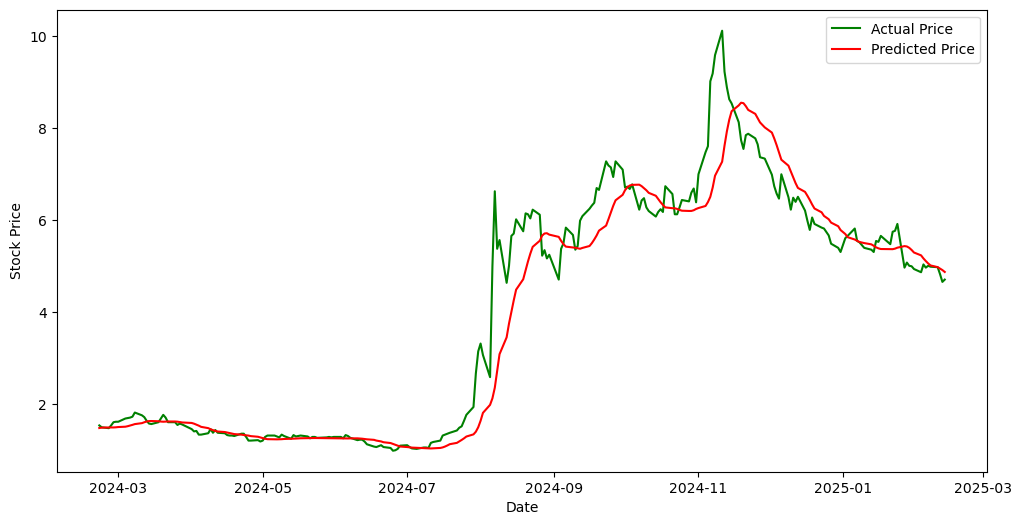

In [59]:
#plot the actual prices (ex-post) 
# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(stock_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual Price", color="green")
plt.plot(stock_data.index[-len(y_test):], predictions, label="Predicted Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [61]:
# Using the last 60 days to predict the next 7 days 
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps -7):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps: i+n_steps+7, 0])
    return np.array(X), np.array(y)

n_steps = 60 
X, y = create_sequences(scaled_data, n_steps)

#reshape for LSRM (samples, timesteps, features)
X= X.reshape((X.shape[0], X.shape[1], 1))

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input  # Import Input layer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM Model
model = Sequential([
    Input(shape=(n_steps, 1)),  # Define input shape with Input layer
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(7)
])


In [71]:
#Make preditcions to forcast the next 7 Days 
last_60_days = scaled_data[-n_steps:].reshape(1,n_steps, 1) #using the last 60 days 
next_week_prices_scaled = model.predict(last_60_days)
next_week_prices = scaler.inverse_transform(next_week_prices_scaled)[0] #convert back to original scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


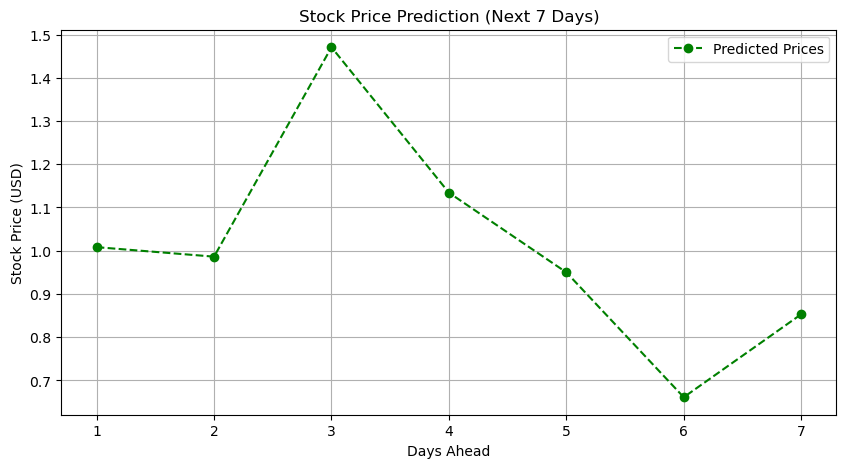

In [75]:
# Visualize prediction 
future_days = np.arange(1, 8)  # Corrected np.arrange to np.arange
plt.figure(figsize=(10,5))
plt.plot(future_days, next_week_prices, label="Predicted Prices", color="green", linestyle="dashed", marker="o")  # Corrected "labell" to "label"
plt.xlabel("Days Ahead")
plt.ylabel("Stock Price (USD)")  
plt.title("Stock Price Prediction (Next 7 Days)")
plt.legend()
plt.grid()
plt.show()
